In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Desktop\Kullai mini project\cvd dataset\cardio_train.csv",sep=';')  # Replace with actual dataset path
df = df.dropna()

# Separate numerical and categorical columns


In [2]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

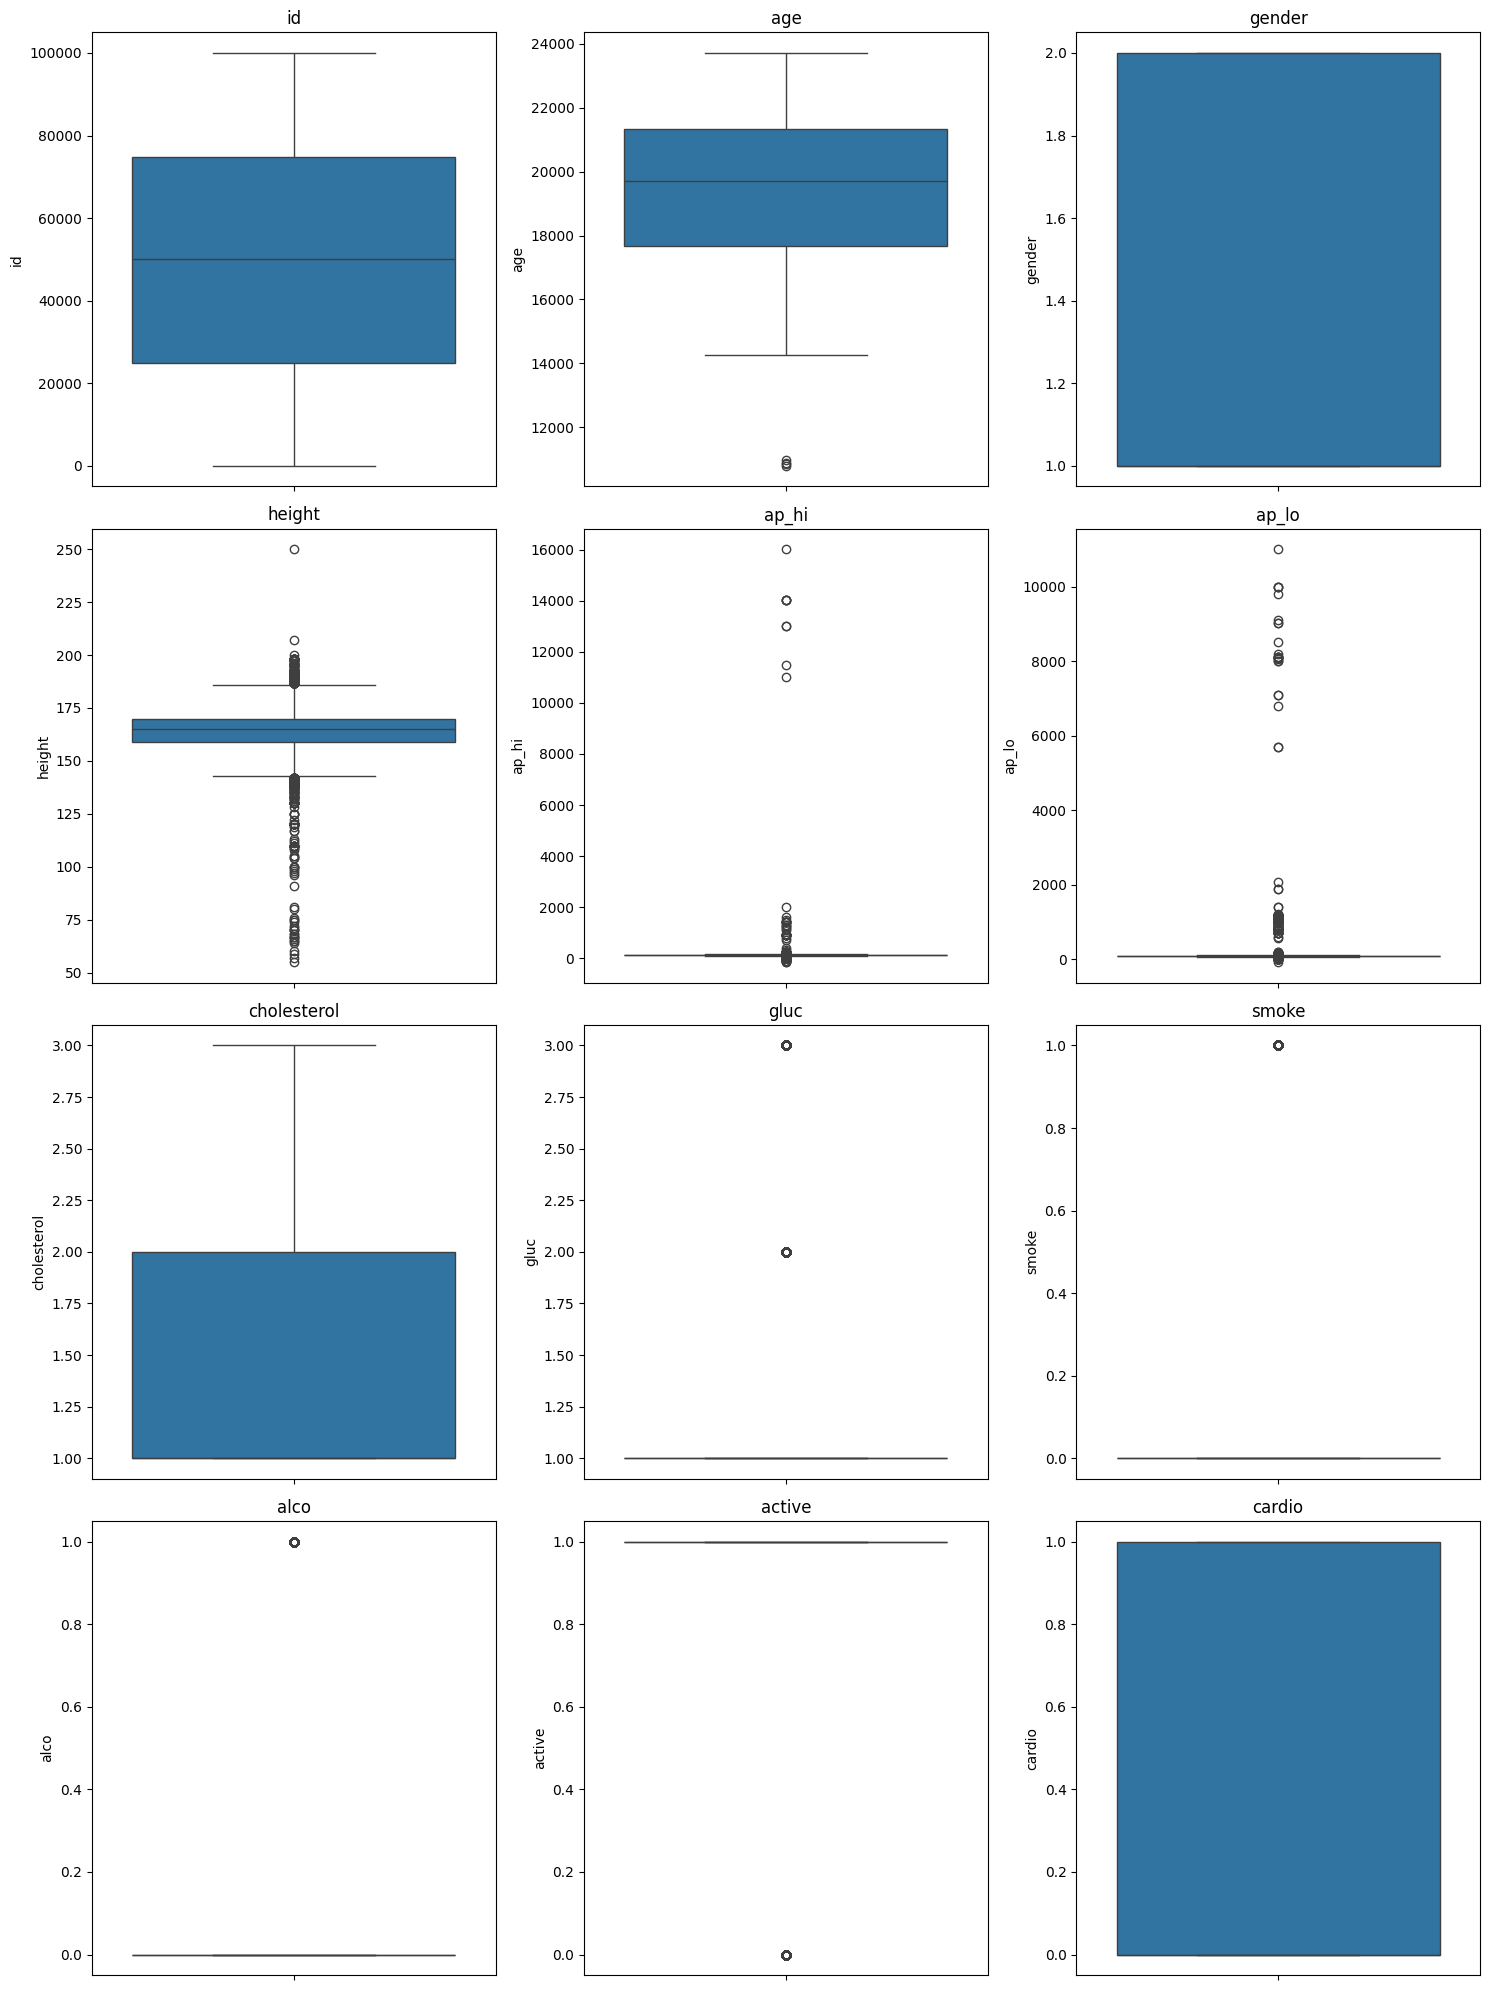

In [7]:
import seaborn as sns
numerical_features = ['id', 'age', 'gender', 'height', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create subplots (4 rows, 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hide unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])  # Remove empty plots

# Adjust layout
plt.tight_layout()
plt.show()



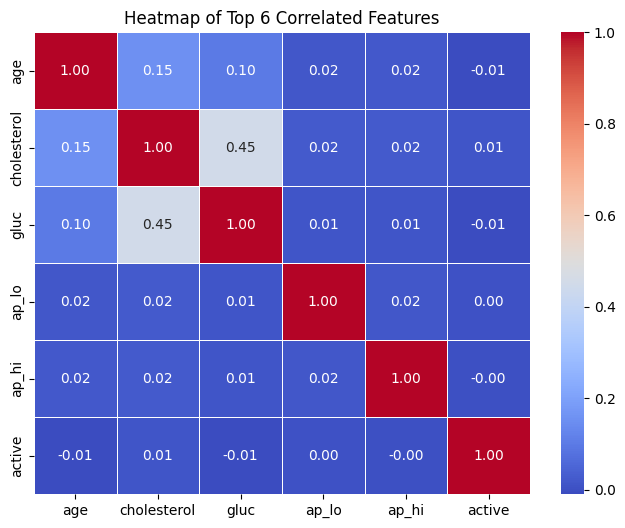

In [8]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Find top 6 features most correlated with "Diabetes_012" (absolute values)
top_features = corr_matrix['cardio'].abs().sort_values(ascending=False)[1:7].index  # Exclude target itself

# Heatmap for top 6 correlated features
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 6 Correlated Features")
plt.show()


In [9]:
X = df.drop(columns=['id','cardio'])
y = df['cardio']
# Apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [10]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

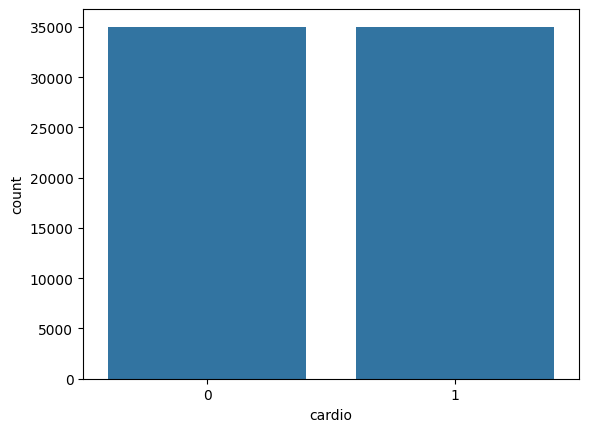

In [11]:
sns.countplot(x=df['cardio'])

In [12]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Metrics for Neural Network (Deep NN):
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      6988
           1       0.79      0.55      0.65      7012

    accuracy                           0.70     14000
   macro avg       0.72      0.70      0.69     14000
weighted avg       0.72      0.70      0.69     14000





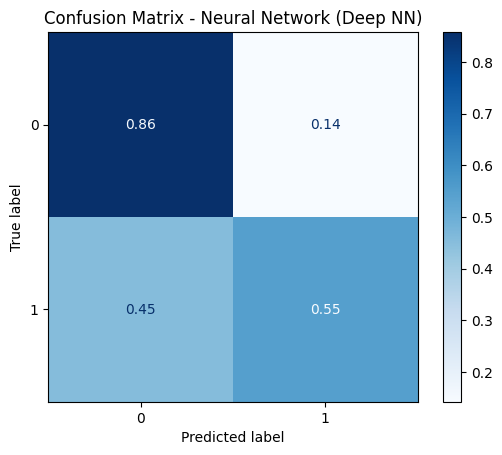

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      6988
           1       0.68      0.63      0.65      7012

    accuracy                           0.66     14000
   macro avg       0.67      0.66      0.66     14000
weighted avg       0.67      0.66      0.66     14000





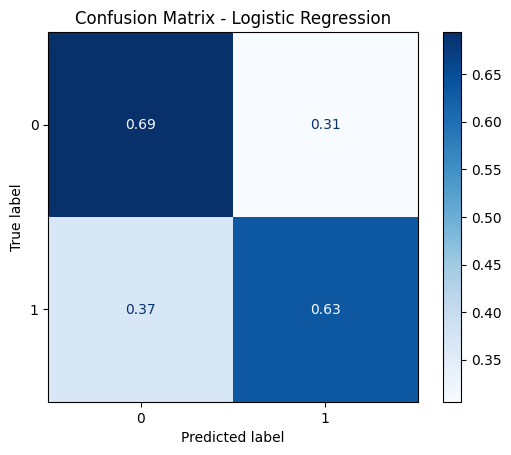

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000





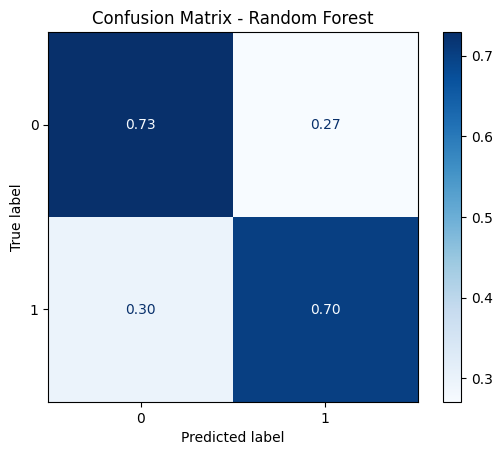

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      6988
           1       0.64      0.65      0.64      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000





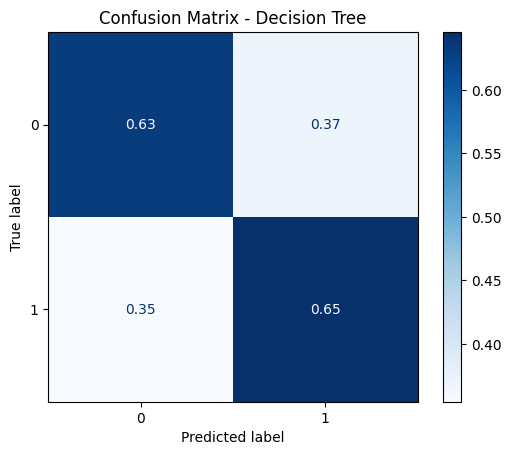

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:15:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000





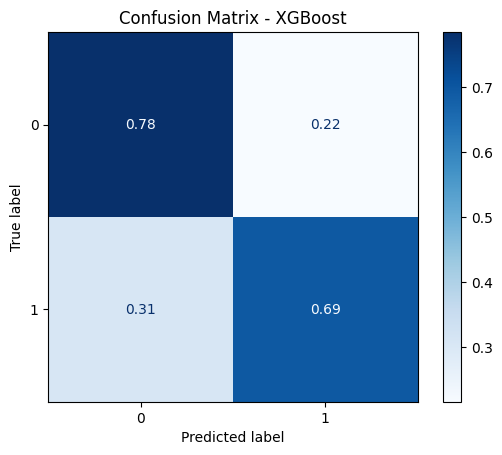

Metrics for MLP Classifier (Simple):
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.72      0.72     14000





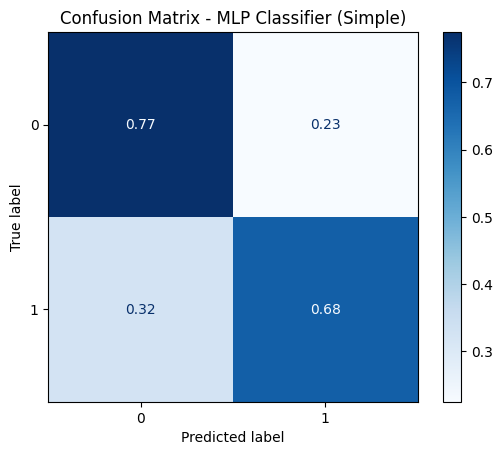

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

Metrics for LSVC (Proper LinearSVC):
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      6988
           1       0.67      0.63      0.65      7012

    accuracy                           0.66     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.66      0.66      0.66     14000





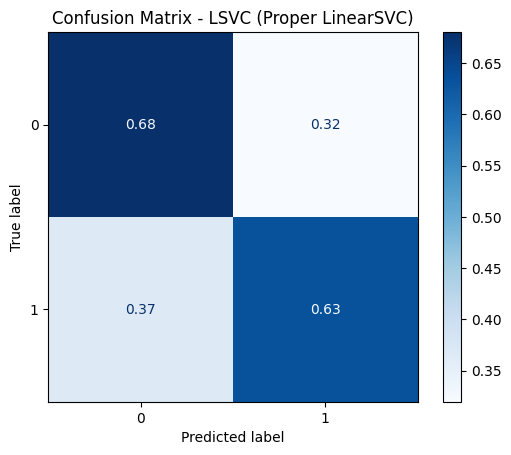

                          Accuracy  Precision    Recall  F1-Score       AUC
Neural Network (Deep NN)  0.701714   0.794069  0.546064  0.647118  0.782924
Logistic Regression       0.664429   0.675622  0.634769  0.654559  0.723077
Random Forest             0.715643   0.722312  0.702225  0.712127  0.773486
Decision Tree             0.638286   0.637067  0.645608  0.641309  0.638248
XGBoost                   0.739143   0.763488  0.694238  0.727218  0.803459
MLP Classifier (Simple)   0.724929   0.750515  0.675271  0.710908  0.785512
LSVC (Proper LinearSVC)   0.656429   0.665067  0.632630  0.648443       NaN


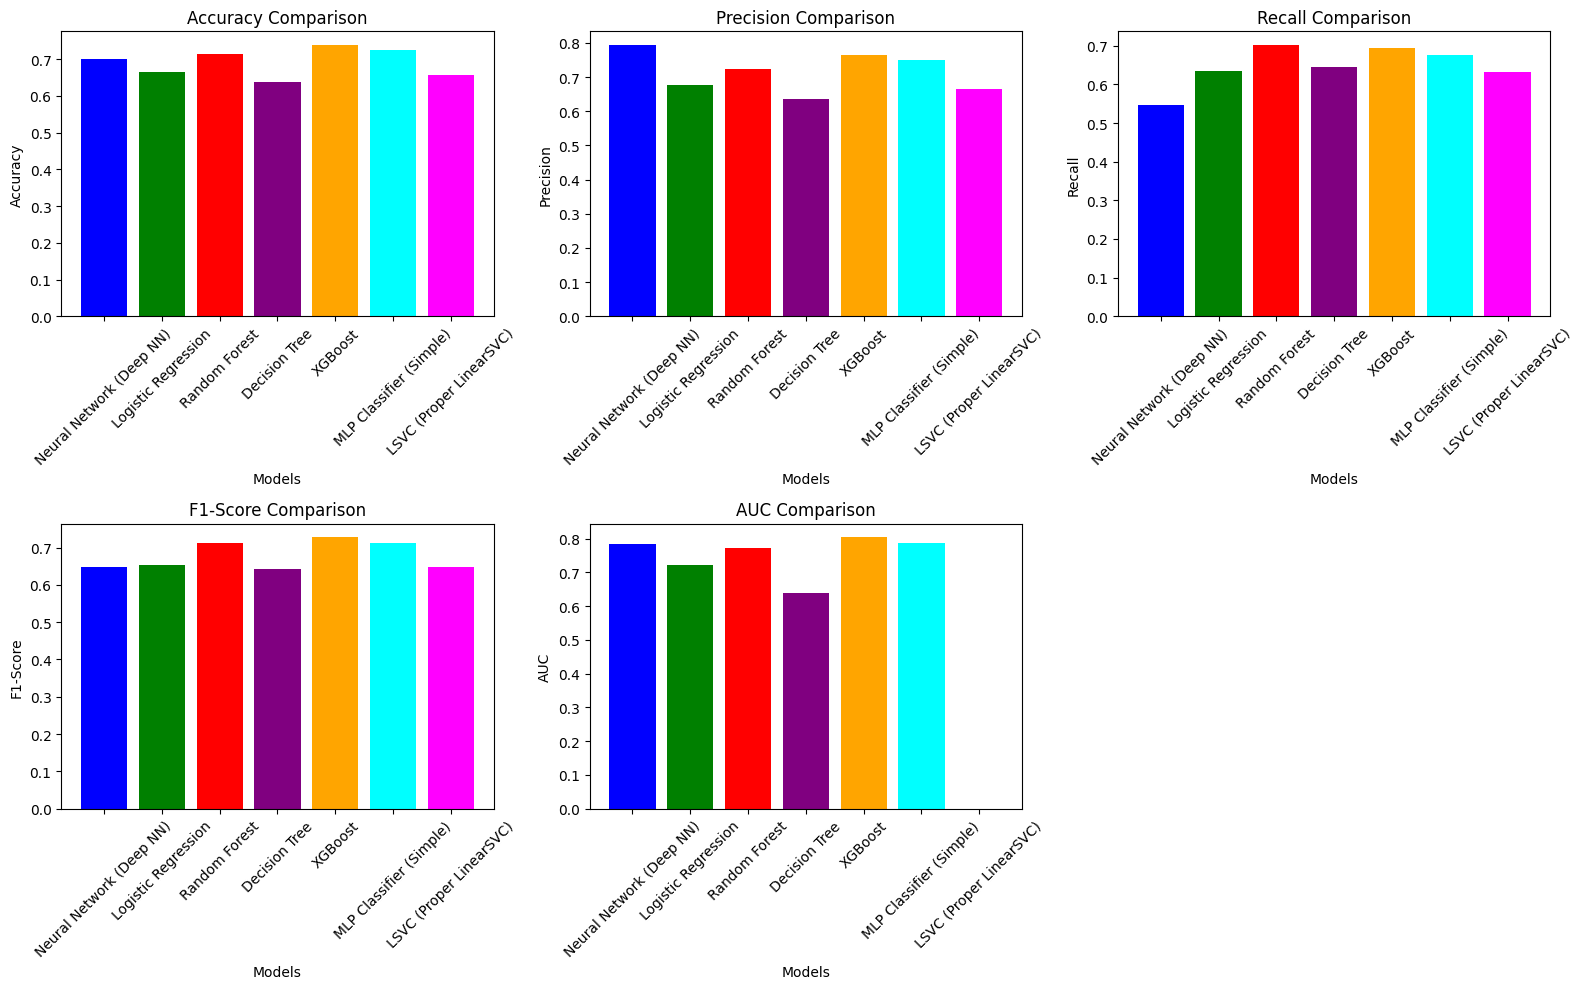

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your features and labels
# Example: X_scaled = StandardScaler().fit_transform(X)
# Make sure you already have X_scaled and y ready

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Random UnderSampling to balance classes
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Proper LSVC model with calibration
base_lsvc = LinearSVC(random_state=1, C=1, max_iter=3000)
lsvc = CalibratedClassifierCV(base_lsvc)

# Initialize models
models = {
    "Neural Network (Deep NN)": MLPClassifier(
        random_state=1,
        max_iter=400,
        learning_rate_init=0.005,
        learning_rate='constant',
        hidden_layer_sizes=(8, 4, 4),
        activation='relu'
    ),
    
    "Logistic Regression": LogisticRegression(
        random_state=1,
        max_iter=400,
        solver='lbfgs',
        n_jobs=-1,
        C=10
    ),
    
    "Random Forest": RandomForestClassifier(
        random_state=1,
        max_features='sqrt',
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=1,
        splitter='random',
        criterion='entropy',
        class_weight='balanced'
    ),
    
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="mlogloss",
        random_state=1,
        learning_rate=0.05,
        n_estimators=100,
        tree_method='exact'
    ),
    
    "MLP Classifier (Simple)": MLPClassifier(
        random_state=1,
        hidden_layer_sizes=(50, 50),
        max_iter=100
    ),
    
    "LSVC (Proper LinearSVC)": lsvc
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled (undersampled) data
    y_pred = model.predict(X_test)  # Test on original test set
    
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None and name != "LSVC (Proper LinearSVC)" else None


    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

# Plot comparison of metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

plt.figure(figsize=(16, 10))

plot_df = results_df.fillna(0)
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(plot_df.index, plot_df[metric], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6988
           1       0.66      0.63      0.64      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000





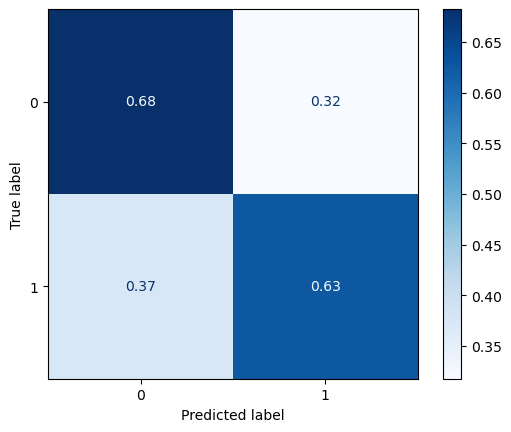

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000





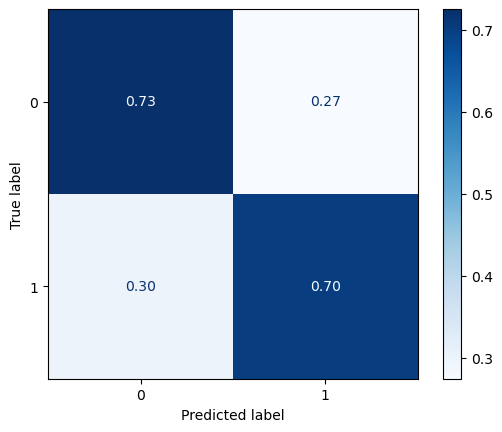

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000





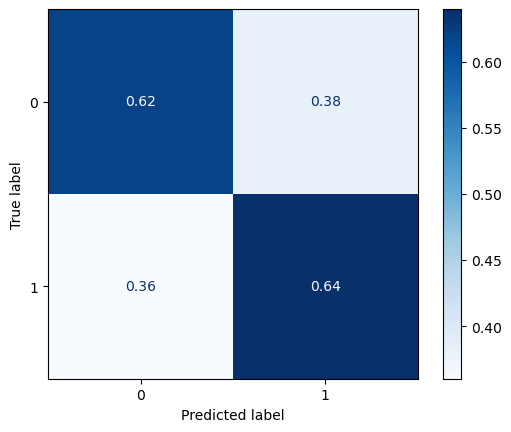

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:28:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000





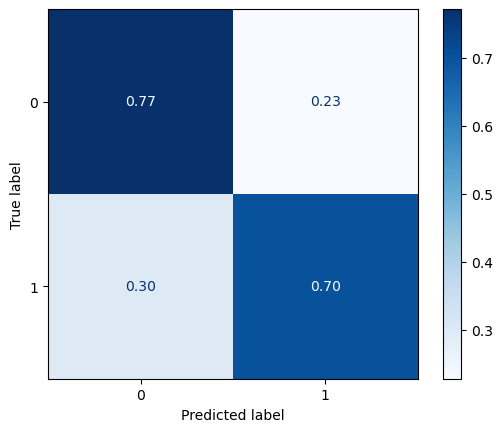

Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6988
           1       0.78      0.63      0.69      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000





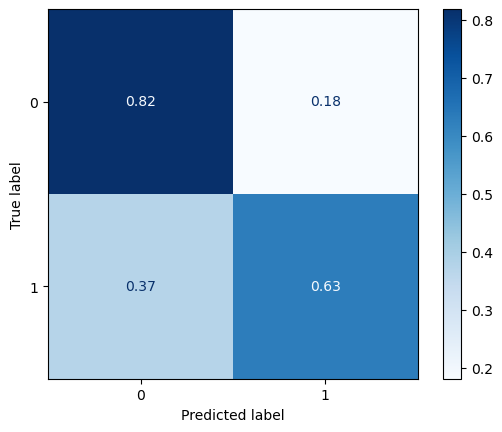

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.653786   0.663891  0.625357  0.644048  0.708833
Random Forest        0.712286   0.718576  0.699515  0.708917  0.772863
Decision Tree        0.629000   0.627062  0.639760  0.633347  0.629044
XGBoost              0.735714   0.754691  0.699800  0.726210  0.797721
MLP Classifier       0.723214   0.776680  0.627924  0.694425  0.787497


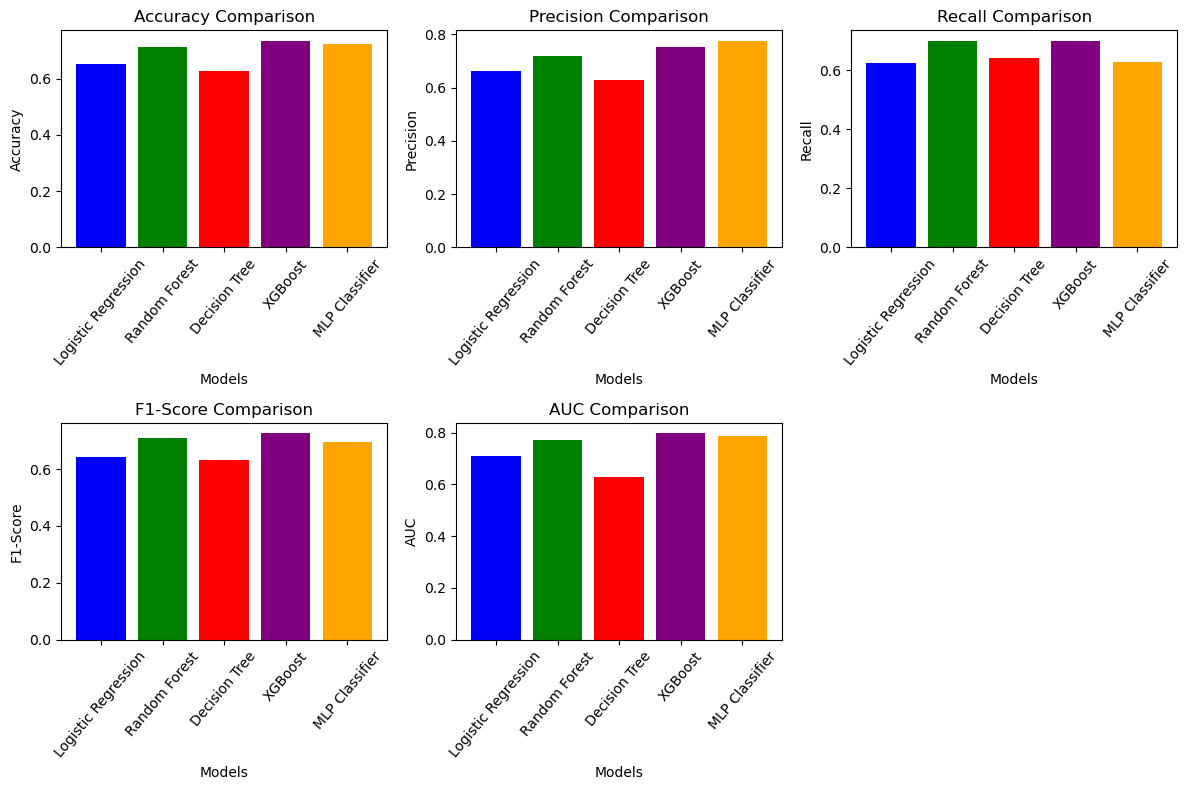

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=50)

plt.tight_layout()
plt.show()


Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6924
           1       0.67      0.62      0.64      7085

    accuracy                           0.65     14009
   macro avg       0.65      0.65      0.65     14009
weighted avg       0.65      0.65      0.65     14009





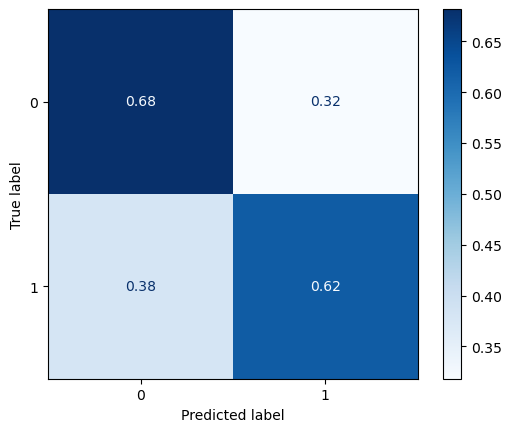

Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6924
           1       0.73      0.71      0.72      7085

    accuracy                           0.72     14009
   macro avg       0.72      0.72      0.72     14009
weighted avg       0.72      0.72      0.72     14009





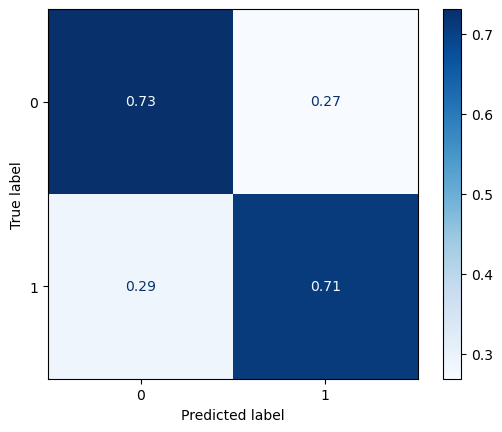

Metrics for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6924
           1       0.64      0.65      0.64      7085

    accuracy                           0.64     14009
   macro avg       0.64      0.64      0.64     14009
weighted avg       0.64      0.64      0.64     14009





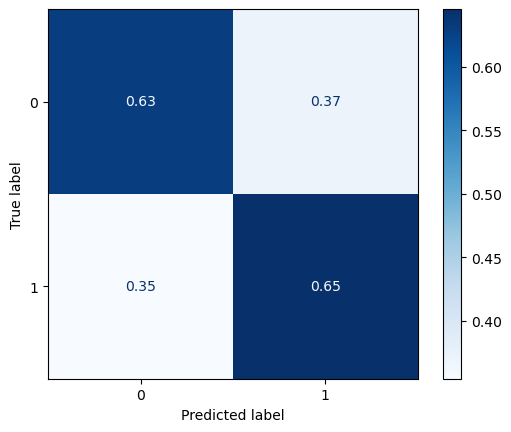

C:\Users\kulla\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6924
           1       0.77      0.70      0.73      7085

    accuracy                           0.74     14009
   macro avg       0.74      0.74      0.74     14009
weighted avg       0.74      0.74      0.74     14009





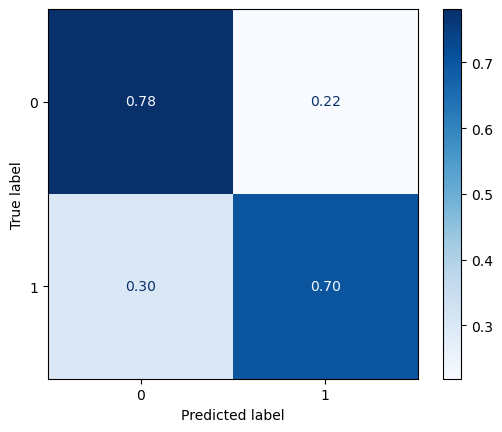

Metrics for MLP Classifier:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6924
           1       0.77      0.64      0.70      7085

    accuracy                           0.72     14009
   macro avg       0.73      0.72      0.72     14009
weighted avg       0.73      0.72      0.72     14009





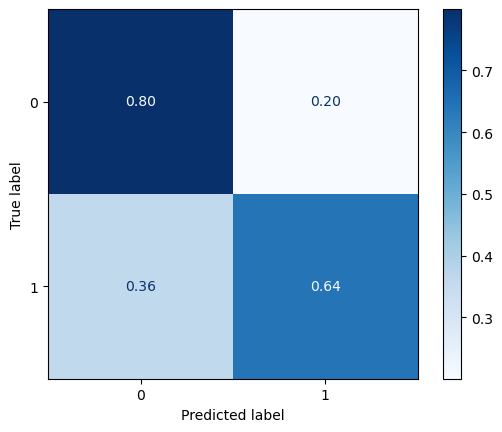

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.650225   0.665756  0.619337  0.641708  0.705201
Random Forest        0.720608   0.730016  0.710233  0.719989  0.778811
Decision Tree        0.637376   0.640347  0.645589  0.642958  0.637255
XGBoost              0.740238   0.765977  0.700353  0.731697  0.801120
MLP Classifier       0.719894   0.766033  0.642343  0.698756  0.785597


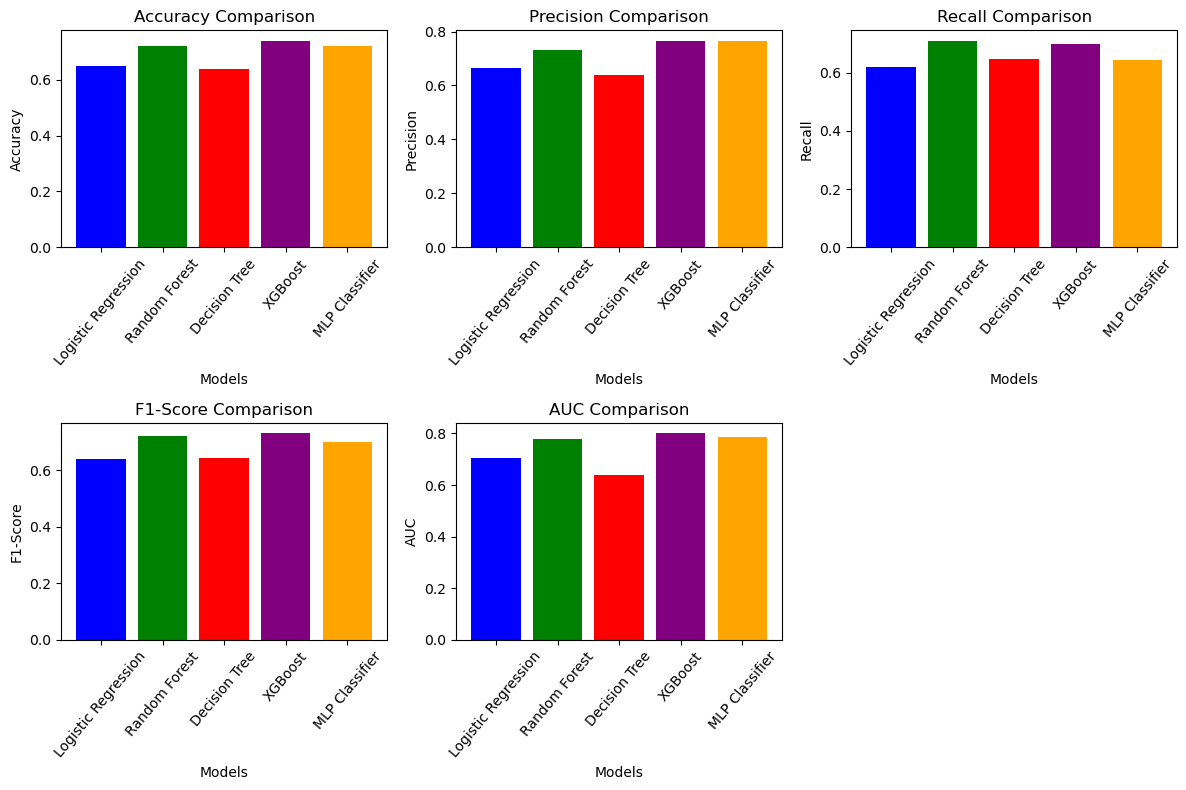

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
     "Decision Tree": DecisionTreeClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50),max_iter=100)
}

# Store results
results = {}

# Train models and evaluate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores
    print(f"Metrics for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    cm=confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Display the normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.show()
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store in dictionary
    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=50)

plt.tight_layout()
plt.show()


In [28]:
import shap
# Get feature names (after encoding)
feature_names = df.drop(columns=['id','cardio']).columns.tolist()
print(feature_names)
# Convert X_test to a DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Create the SHAP Explainer
explainer = shap.Explainer(models["XGBoost"], X_test_df)

# Get SHAP Explanation object
shap_values = explainer(X_test_df)



['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


100%|===================| 13985/14009 [01:46<00:00]        

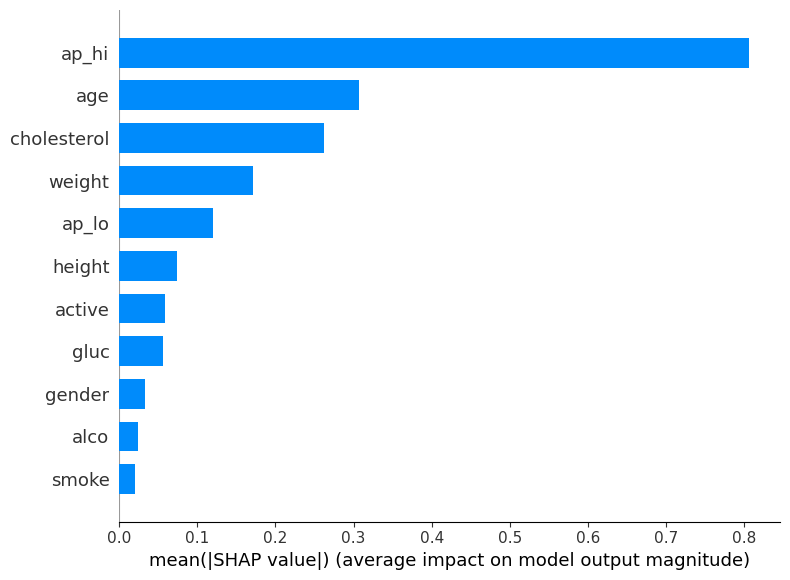

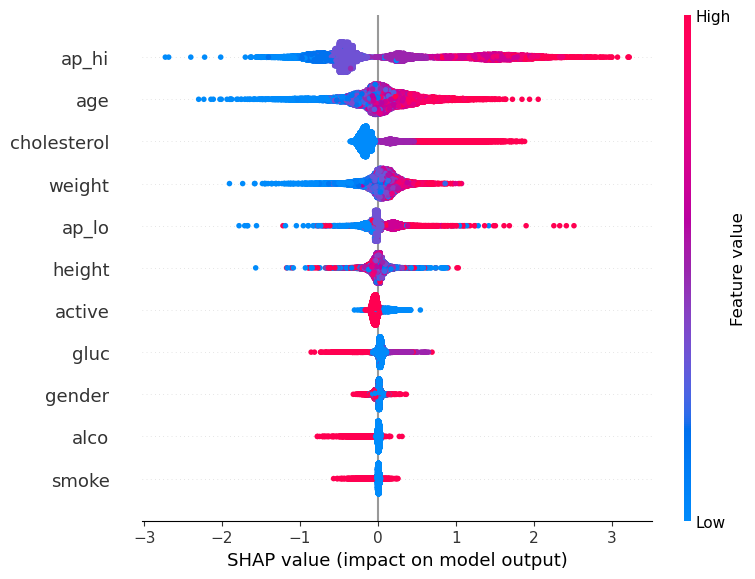

In [29]:
# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Bar plot of mean absolute SHAP values
shap.summary_plot(shap_values, X_test)  # Detailed beeswarm plot


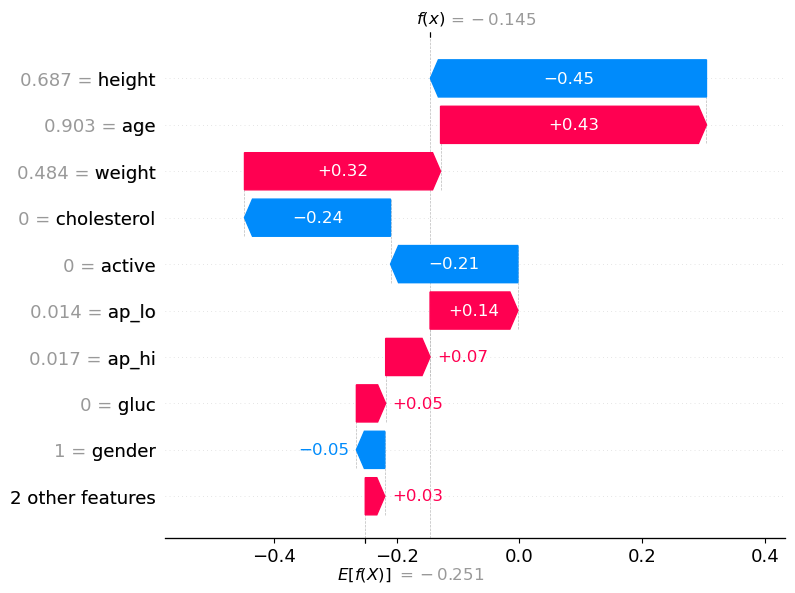

In [30]:
# Local explanation for a single instance
i = 5  # Change index to explore other instances
shap.plots.waterfall(shap_values[i])  # Waterfall plot (great for single prediction explanation)


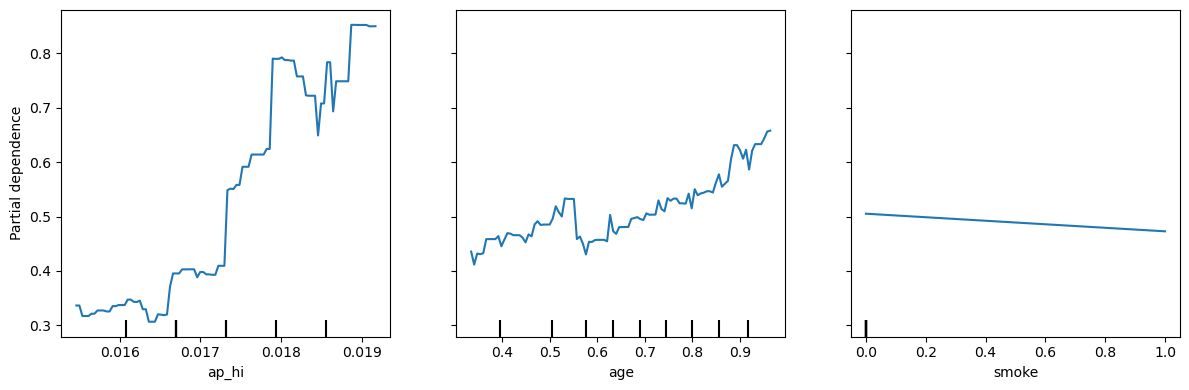

In [31]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Pick feature names you want to analyze
features_to_plot = ['ap_hi','age','smoke']  # Replace with your actual feature names

fig, ax = plt.subplots(figsize=(12, 4))

PartialDependenceDisplay.from_estimator(
    models["XGBoost"],
    X_test_df,  # Make sure it's a DataFrame with column names
    features=features_to_plot,
    feature_names=feature_names,  # Optional if X_test_df has column names
    ax=ax
)

plt.tight_layout()
plt.show()
